# Problem Statement
- The objective of this project is to predict the number of bike rentals based on various factors such as season, time of day, weather, and more. This information can help bike rental companies optimize their inventory and staffing levels, as well as improve their marketing efforts to attract more customers.

- To achieve this objective, we will first clean the dataset by removing any missing or irrelevant data, and then perform exploratory data analysis to identify any patterns or relationships between the features and the target variable. We will also use data visualization techniques to better understand the distribution of the data and identify any outliers or anomalies.

- Once we have a good understanding of the data, we will then build a machine learning model to predict the number of bike rentals. We will use various regression algorithms such as Linear Regression, Ridge Regression, Lasso Regression,Gradient boosting and Random Forest Regression to build and evaluate our models. We will use techniques such as cross-validation and hyperparameter tuning to ensure that our models are robust and accurate.

- At the end of the project, we will evaluate the performance of our models using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score. We will also create visualizations to help interpret the results and communicate our findings to stakeholders.

- Overall, this project will provide valuable insights into the factors that influence bike rentals and help rental companies optimize their operations and improve their profitability.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
df = pd.read_csv("/content/hour.csv")

In [3]:
# checking the dataset
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# getting info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# getting basic statistics for numerical variables
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Data Cleaning

In [6]:
# separating column as object and numerical for smooth operations
obj_col = [col for col in df.columns if df[col].dtype=="object"]
num_col = [col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=="float64"]

In [7]:
# checking for null values
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- No null values spotted in the dataset


In [8]:
# checking for duplicate values
df[df.duplicated()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


- No duplicate values found in the dataset

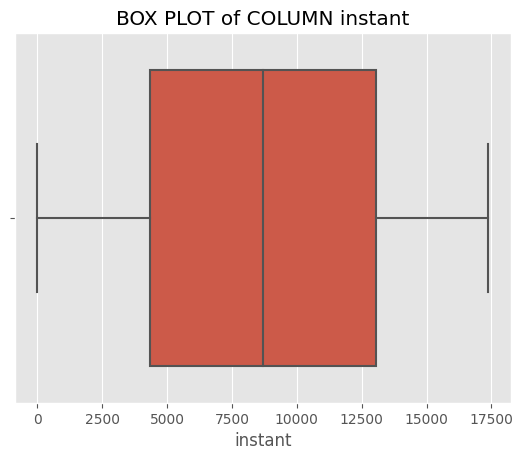

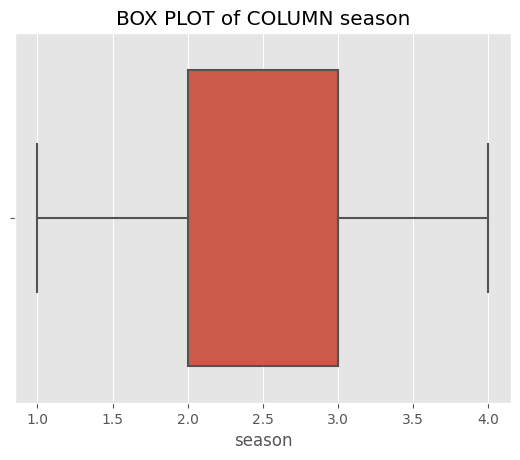

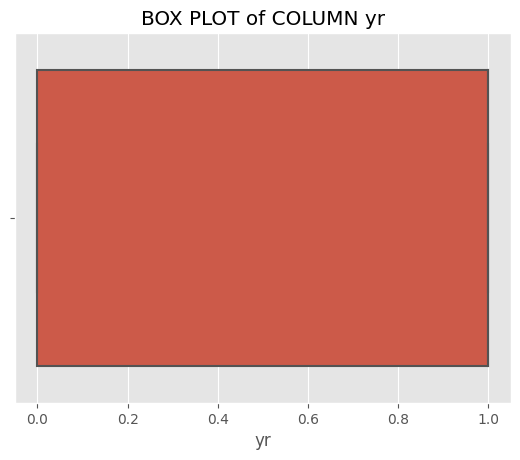

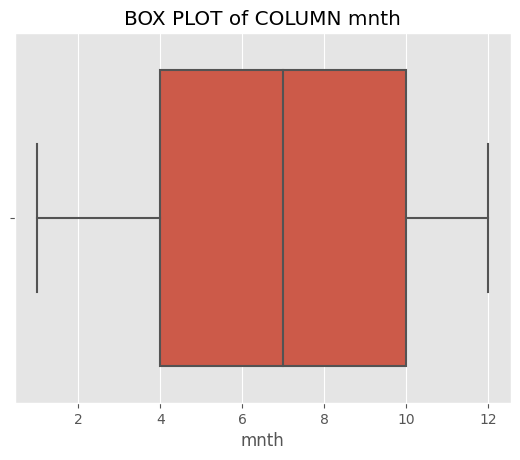

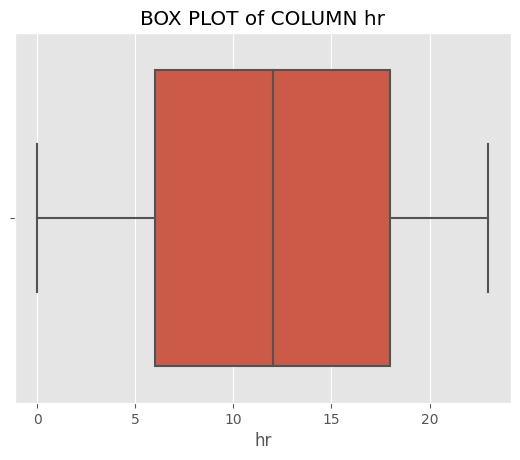

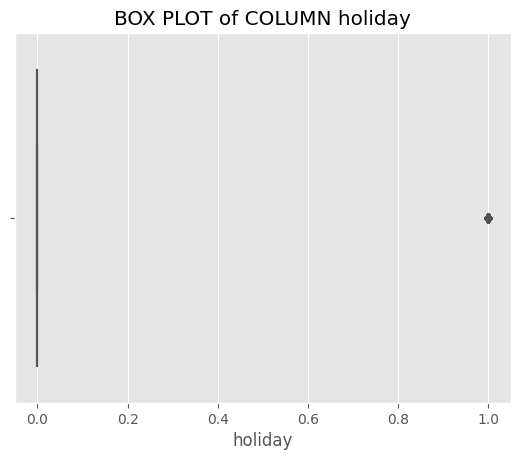

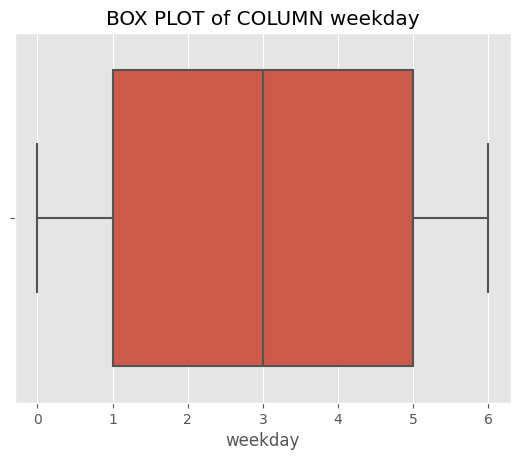

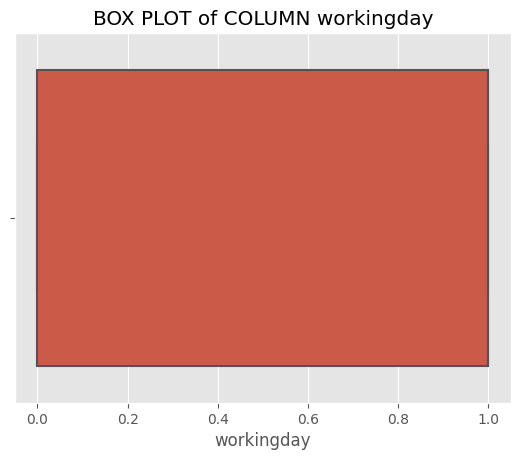

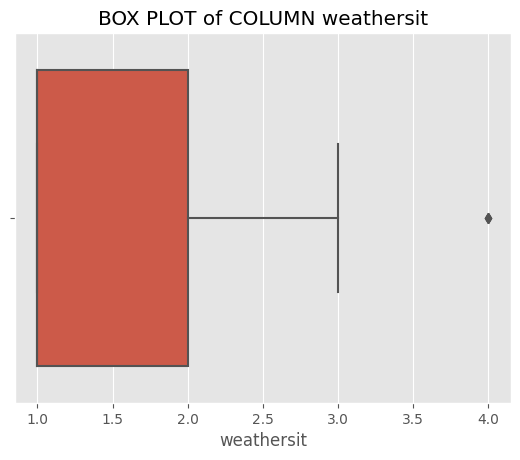

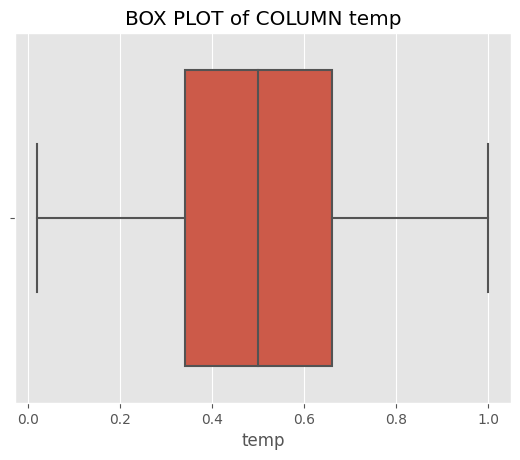

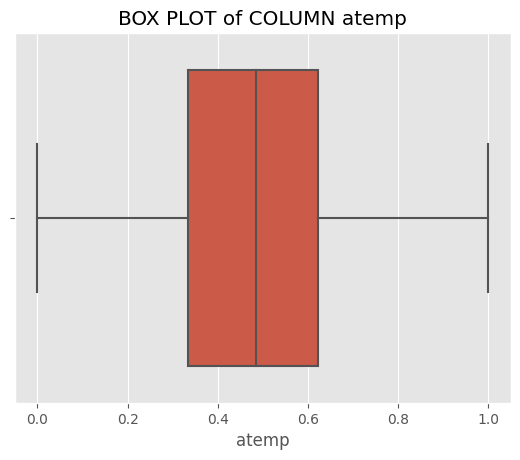

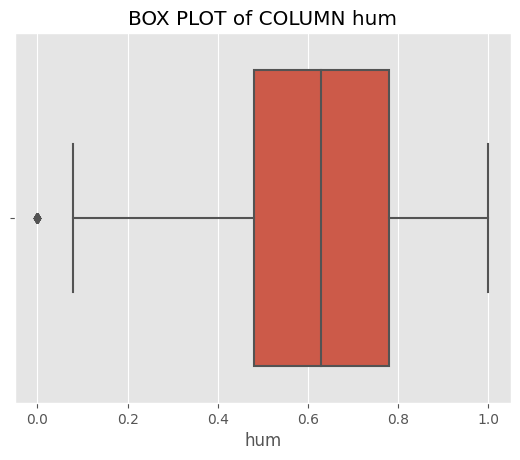

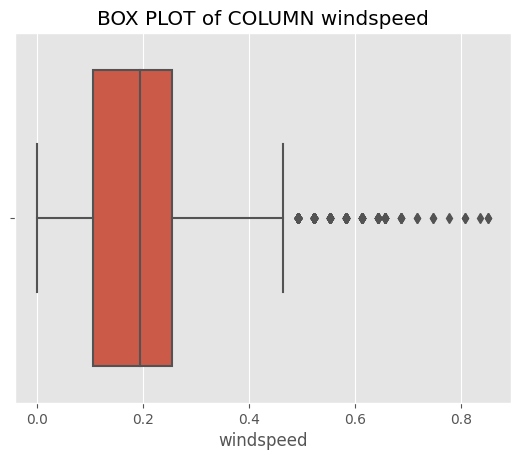

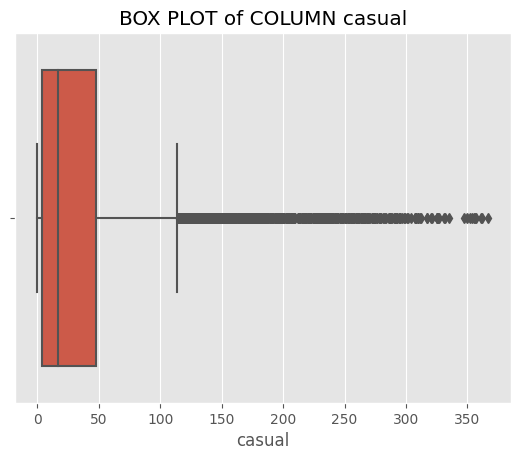

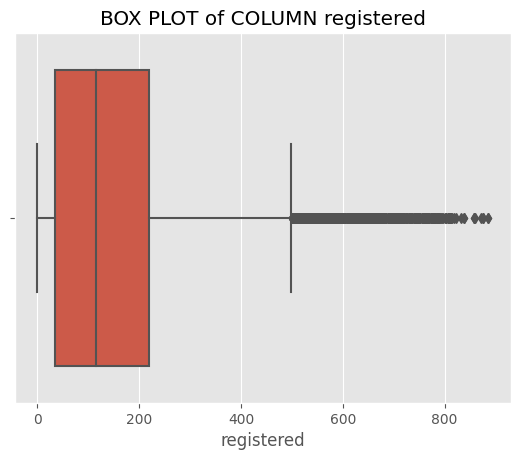

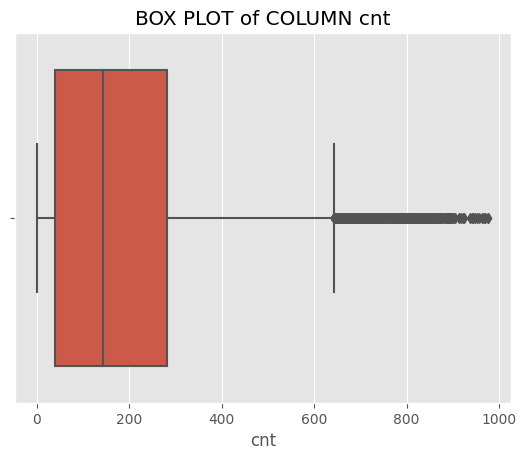

In [9]:
# Checking For Outliers
for col in num_col:
  sns.boxplot(x = df[col])
  plt.title("BOX PLOT of COLUMN {}".format(col))
  plt.show()

- There are some numerical columns that contains outliers, as it is evident from the boxplot.

In [10]:
# making  a function that remove the outliers from columns by using IQR method
def remove_outliers_iqr(df, columns=None, k=1.5):
    if columns:
        numerical_cols = columns
    else:
        numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    new_df = df.copy()
    for col in numerical_cols:
        q1 = new_df[col].quantile(0.25)
        q3 = new_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        new_df = new_df[(new_df[col] >= lower_bound) & (new_df[col] <= upper_bound)]
    return new_df


In [11]:
# storing column names in a list containing outliers
outlier_col = ["windspeed","casual","registered","cnt"]


In [12]:
# storing the cleaned dataset as df2
df2 = remove_outliers_iqr(df, outlier_col)

# Data Analysis and Visualization

In [13]:
df2["dteday"] = pd.to_datetime(df2["dteday"])

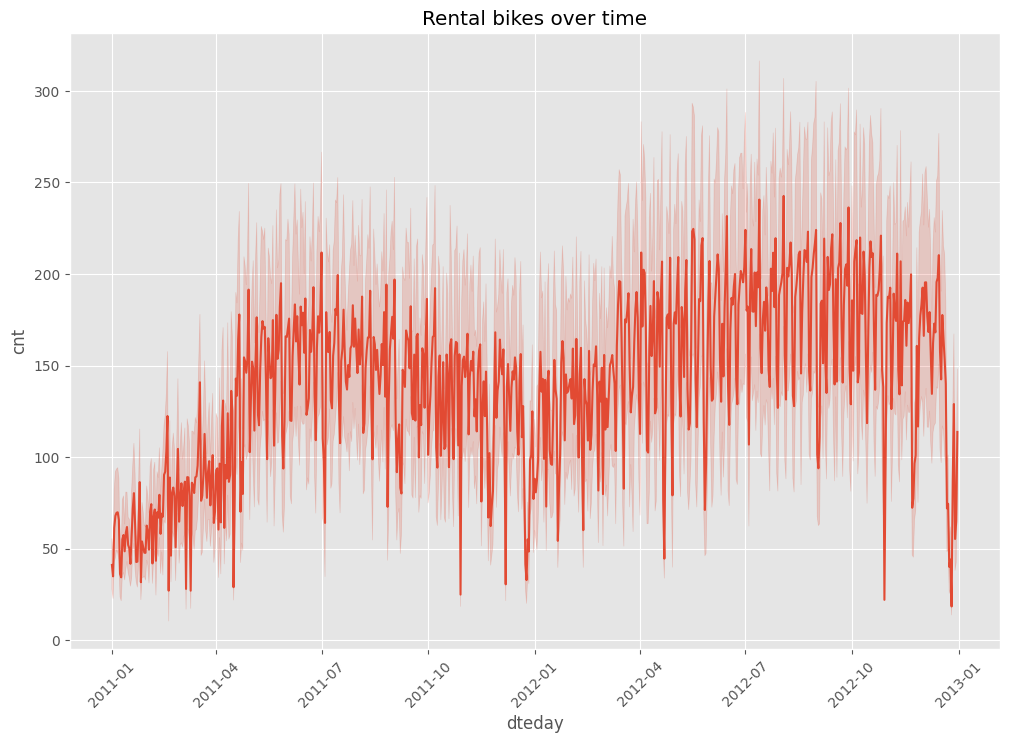

In [14]:
plt.figure(figsize=(12,8))
sns.lineplot(x="dteday",y="cnt",data=df2,ci=False)
plt.title("Rental bikes over time")
plt.xticks(rotation=45)
plt.show()

- The line chart shows increas in rental bike from april to august and it starts decreasing after august each year. The number of bikes rented are the least at the of a year and start of the next year

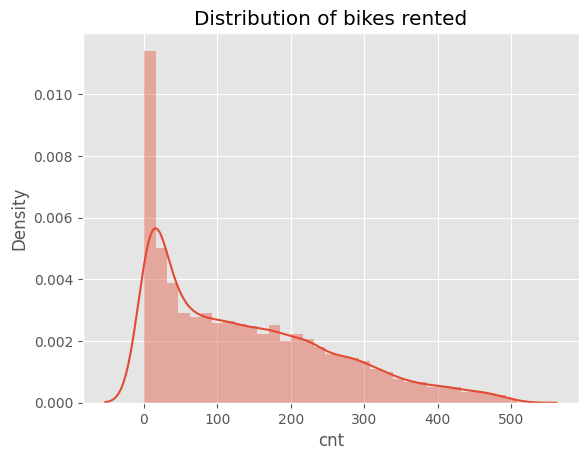

In [15]:
# distribution of bikes rented
sns.distplot(df2["cnt"])
plt.title("Distribution of bikes rented")
plt.show()

- The distplot shows that the most number of bikes rented on a data are from 0-100, and most rented bikes are 500

In [16]:
weather = df2.groupby("weathersit")["cnt"].mean()

In [17]:
df2.loc[df2["weathersit"]==1,"weather_type"] = "Clear"
df2.loc[df2["weathersit"]==2,"weather_type"] = "Mist/Cloudy"
df2.loc[df2["weathersit"]==3,"weather_type"] = "Light snow/light rain"
df2.loc[df2["weathersit"]==4,"weather_type"] = "Heavy rain"

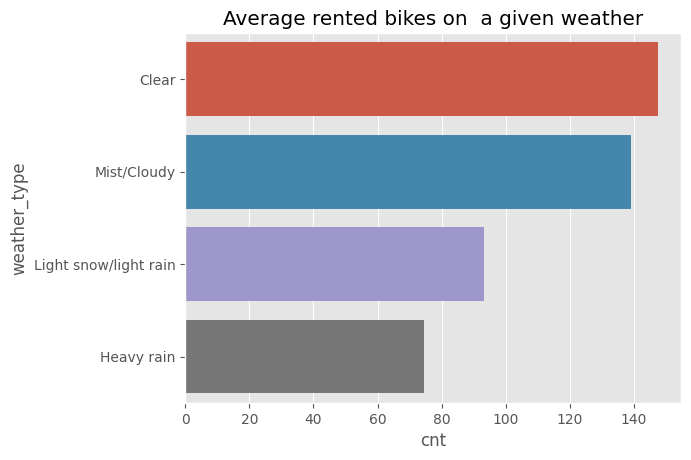

In [18]:
sns.barplot(y="weather_type",x="cnt",data=df2,ci=False)
plt.title("Average rented bikes on  a given weather")
plt.show()

- The above barplot shows average rented bikes in a given weather. Most bikes are rented when the weather is clear or misty and least are rented when there is light snow/ light rain and heavy rain.

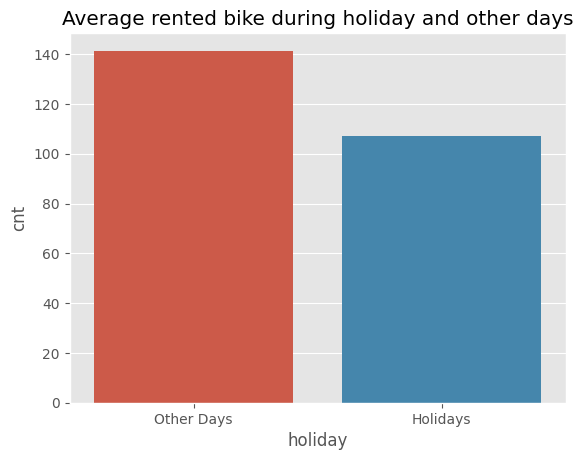

In [19]:
sns.barplot(x="holiday",y="cnt",data=df2,ci=False)
plt.title("Average rented bike during holiday and other days")
plt.gca().set_xticklabels(['Other Days', 'Holidays'])
plt.show()

- The barplot shows, the average number of bikes rented on holidays are less as compared to other days

In [20]:
# creatig a new column that contains name of the weekday
df2['weekday_name'] = df2['dteday'].dt.day_name()

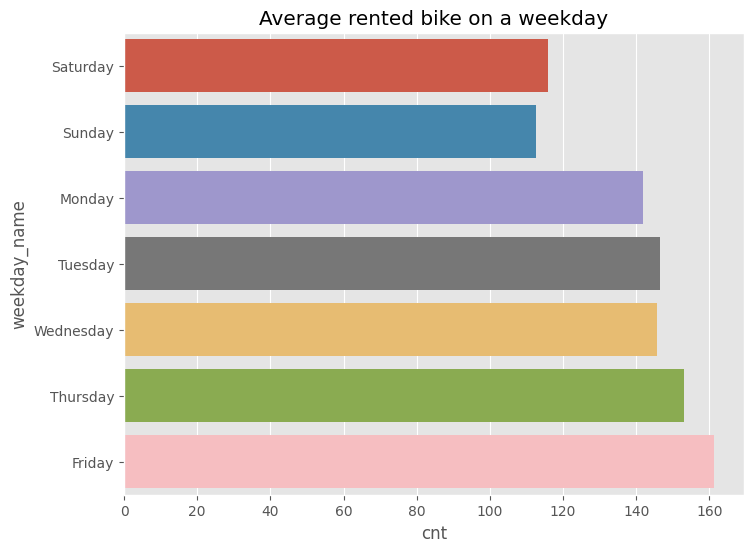

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(y="weekday_name",x="cnt",data=df2,ci=False,)
plt.title("Average rented bike on a weekday")
plt.show()

- The barchart shows that the average number of bikes rented on a weekday are most on Friday. Bikes rented on Sunday are the least

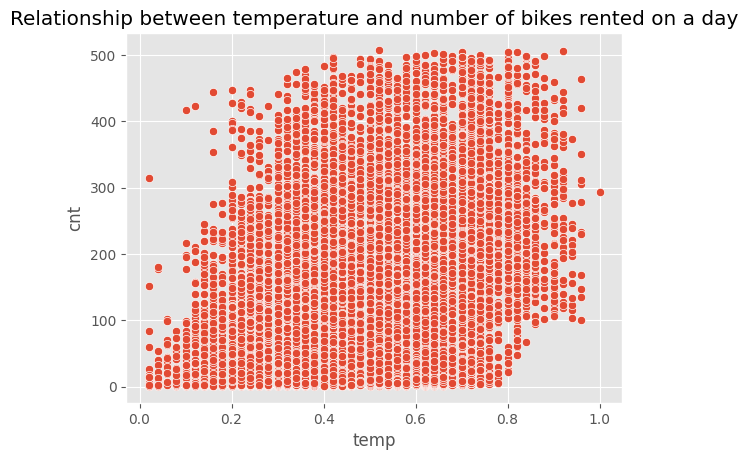

In [22]:
sns.scatterplot(x="temp",y="cnt",data=df2)
plt.title("Relationship between temperature and number of bikes rented on a day")
plt.show()

- The relationship is quite ambiguous

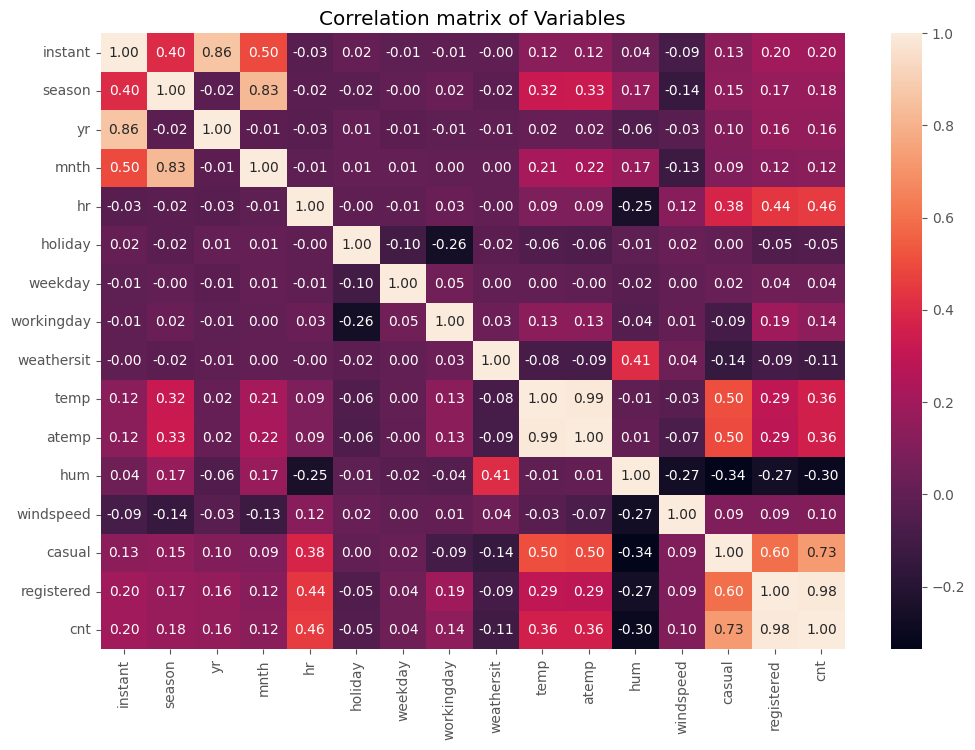

In [23]:
# computing correlation coeficient of variables
corr = df2.corr()

# visualizin the correlations with seaborn heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.title("Correlation matrix of Variables")
plt.show()

- A correlation coefficient is a number between -1 and 1 that tells you the strength and direction of a relationship between variables. If correlation of two variables is +1 than they are strongly correlated and have the same direction which means if one is increased the other one also tends to increase and vice verse

# Data preparationg For Machine Learning

In [25]:
# # Splitting the data into features and target variable
X = df2.copy()
X.drop(["instant","cnt",'weekday_name',"dteday","weather_type"],axis=1,inplace=True)
y = df2[["cnt"]]

In [26]:
# splitting data into 80% training and 20% testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

# Linear Regression
- Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The goal of linear regression is to find the best-fitting straight line through the data points.

- The equation for a simple linear regression model is:
y = b0 + b1*x

- where y is the dependent variable, x is the independent variable, b0 is the y-intercept, and b1 is the coefficient (slope) of the independent variable.

# Models I used for Regression are:
- Linear Regression
- Random Forest Regressor
- Ridge Regressor
- Lasso Regressor
- Gradient Boosting Regressor

- Following are the metrics I used to evaluate the regression models.

- RMSE (Root Mean Squared Error) is the standard deviation of the residuals. It measures the average distance that the data points deviate from the regression line. It is calculated as the square root of the mean of the squared residuals. A lower RMSE value indicates a better fit.

- R2 score (Coefficient of Determination) is a measure of how well the regression line approximates the real data points. It ranges from 0 to 1, with 1 indicating a perfect fit. A higher R2 score indicates a better fit.

- MAE (Mean Absolute Error) is the average of the absolute values of the residuals. It measures the average magnitude of the errors in the predictions. A lower MAE value indicates a better fit

In [27]:
# initiating all models
linreg = LinearRegression()
rfr = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()
gbr = GradientBoostingRegressor()

# storing the models in a list
models = [linreg,rfr,ridge,lasso,gbr]

# stroing the models name in a list
model_names = ["Linear Regression","Random Forest Regressor","Ridge Regression","Lasso Regression","Gradient Boosting"]

#average rmse
average_rmse = []
# applying a for loop which performs 5 fold cross validation using training set to determine whether the models overfit or not
for model,name in zip(models,model_names):

  # performing cross validation of 5 folds on training set
  cv_score = cross_val_score(model,X_train,y_train,cv=5,scoring="neg_root_mean_squared_error")
  average_rmse.append(-1 * np.mean(cv_score))
  print("cross validation RMSE of {} model are {}".format(name,-1 * cv_score))
  print("-" * 100)

cross validation RMSE of Linear Regression model are [2.85031854e-14 5.33914410e-14 1.18775300e-13 7.58156535e-14
 2.52901236e-13]
----------------------------------------------------------------------------------------------------
cross validation RMSE of Random Forest Regressor model are [1.35586443 1.40030244 1.19681416 1.4384852  1.47981495]
----------------------------------------------------------------------------------------------------
cross validation RMSE of Ridge Regression model are [5.62172442e-06 6.02711304e-06 5.51043606e-06 5.80634398e-06
 5.53191055e-06]
----------------------------------------------------------------------------------------------------
cross validation RMSE of Lasso Regression model are [0.03930464 0.04311973 0.03944134 0.04241856 0.03926373]
----------------------------------------------------------------------------------------------------
cross validation RMSE of Gradient Boosting model are [2.61484891 2.65448264 2.420712   2.61763146 2.64613677]


- Among all the algorithms used linear regression performed the best.


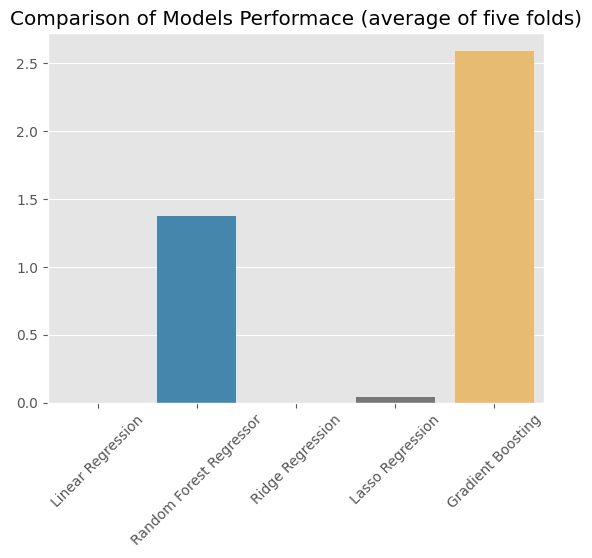

In [28]:
# comparison of algorithms performance
sns.barplot(x=model_names,y=average_rmse)
plt.title("Comparison of Models Performace (average of five folds)")
plt.xticks(rotation=45)
plt.show()

- We choose RMSE as a metric to evaluate models performance, the lesser the better and Linear Regression value of average RMSE is the least

In [29]:
# initiating the model
linreg = LinearRegression()

# fitting the model on training data
linreg.fit(X_train,y_train)

# getting prediction on the testing data
y_pred_linreg = linreg.predict(X_test)

# computing RMSE
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test,y_pred_linreg))

# computing R2 score
coef_deter_lr = metrics.r2_score(y_test,y_pred_linreg)

# computing MAE
mae_lr = metrics.mean_absolute_error(y_test,y_pred_linreg)

print("RMSE of Linear Regression on testing set is {}".format(rmse_lr))
print("-"*100)
print("R2 score of Linear Regression on testing set is {}".format(coef_deter_lr))
print("-"*100)
print("MAE of Linear Regression on testing set is {}".format(mae_lr))
print("-"*100)

RMSE of Linear Regression on testing set is 7.87084222312505e-14
----------------------------------------------------------------------------------------------------
R2 score of Linear Regression on testing set is 1.0
----------------------------------------------------------------------------------------------------
MAE of Linear Regression on testing set is 6.080510737362122e-14
----------------------------------------------------------------------------------------------------
